### 📌 Dataset utilizado

**German Credit Data** — UCI Machine Learning Repository  
Fonte: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

- Arquivo necessário: `german.data`
- 1.000 observações
- Problema binário (1 = bom pagador, 2 = mau pagador)

> O arquivo `german.data` deve estar na mesma pasta do notebook ou ser carregado via upload no Colab.


## 1. Introdução

Este projeto aplica Machine Learning ao contexto de **risco de crédito**, utilizando o conjunto de dados “German Credit Data”.

O objetivo é prever se um solicitante de crédito será:

- **1 = Bom pagador**
- **2 = Mau pagador (inadimplente)**

### Por que isso importa?

Instituições financeiras — como bancos e fintechs — precisam identificar risco com eficiência para:

- reduzir inadimplência
- manter sustentabilidade da carteira
- garantir crédito responsável
- cumprir políticas internas de risco

O pipeline construído aqui segue o fluxo real de desenvolvimento de modelos:

1) EDA  
2) Pré-processamento  
3) Modelagem  
4) Tuning  
5) Explicabilidade  
6) Deploy (API + Docker)


In [1]:
# 1. Importar bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

print("Bibliotecas carregadas com sucesso ✅")

Bibliotecas carregadas com sucesso ✅


In [2]:
from google.colab import files
uploaded = files.upload()


Saving german.data to german.data


In [3]:
df = pd.read_csv('german.data', delim_whitespace=True, header=None)
df.head()


/tmp/ipython-input-2353721703.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('german.data', delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
print("Dimensão da base:", df.shape)
df.info()
df.describe()


Dimensão da base: (1000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory u

,1,4,7,10,12,15,17,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [5]:
# 2. Carregar a base German Credit
colunas = [
    'StatusAccount', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount',
    'Savings', 'EmploymentSince', 'InstallmentRate', 'PersonalStatusSex',
    'OtherDebtors', 'ResidenceSince', 'Property', 'Age', 'OtherInstallPlans',
    'Housing', 'ExistingCredits', 'Job', 'NumLiable', 'Telephone', 'ForeignWorker', 'CreditRisk'
]

df = pd.read_csv('german.data', delim_whitespace=True, header=None, names=colunas)

# Visualizar as primeiras linhas
df.head()


/tmp/ipython-input-3072540685.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('german.data', delim_whitespace=True, header=None, names=colunas)


,StatusAccount,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentSince,InstallmentRate,PersonalStatusSex,OtherDebtors,ResidenceSince,Property,Age,OtherInstallPlans,Housing,ExistingCredits,Job,NumLiable,Telephone,ForeignWorker,CreditRisk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
print("Dimensões:", df.shape)
print("\nTipos de dados:")
print(df.dtypes)
print("\nDistribuição do alvo (CreditRisk):")
print(df['CreditRisk'].value_counts())


Dimensões: (1000, 21)

Tipos de dados:
StatusAccount        object
Duration              int64
CreditHistory        object
Purpose              object
CreditAmount          int64
Savings              object
EmploymentSince      object
InstallmentRate       int64
PersonalStatusSex    object
OtherDebtors         object
ResidenceSince        int64
Property             object
Age                   int64
OtherInstallPlans    object
Housing              object
ExistingCredits       int64
Job                  object
NumLiable             int64
Telephone            object
ForeignWorker        object
CreditRisk            int64
dtype: object

Distribuição do alvo (CreditRisk):
CreditRisk
1    700
2    300
Name: count, dtype: int64


## 3. Análise Exploratória (EDA)

Nesta etapa investigaremos:

- distribuição das classes (balanceamento)
- correlação entre variáveis numéricas
- outliers e dispersões (boxplot, histplot)
- dados faltantes e tipos de variáveis

Objetivo: entender padrões, detectar viés e orientar decisões de pré-processamento.


/tmp/ipython-input-2525023545.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CreditRisk', data=df, palette='pastel')


Valores ausentes por coluna:
StatusAccount        0
Duration             0
CreditHistory        0
Purpose              0
CreditAmount         0
Savings              0
EmploymentSince      0
InstallmentRate      0
PersonalStatusSex    0
OtherDebtors         0
ResidenceSince       0
Property             0
Age                  0
OtherInstallPlans    0
Housing              0
ExistingCredits      0
Job                  0
NumLiable            0
Telephone            0
ForeignWorker        0
CreditRisk           0
dtype: int64


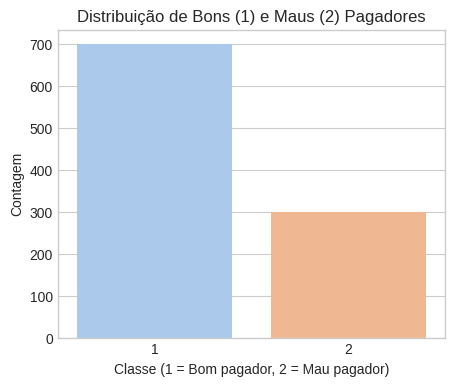

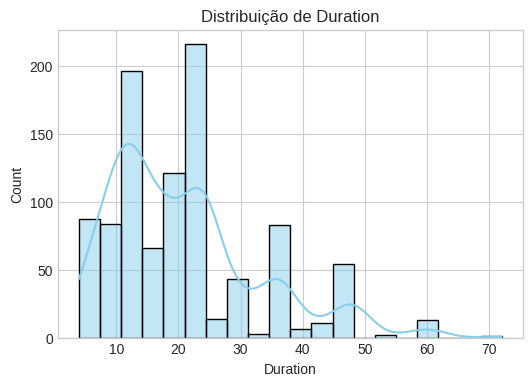

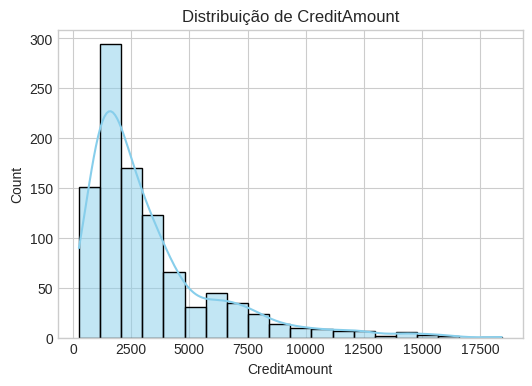

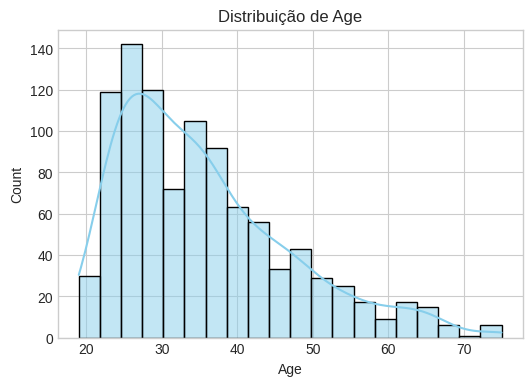

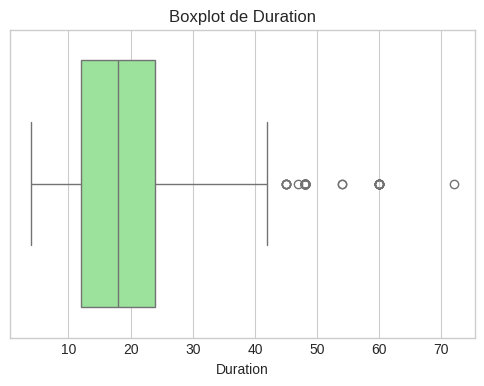

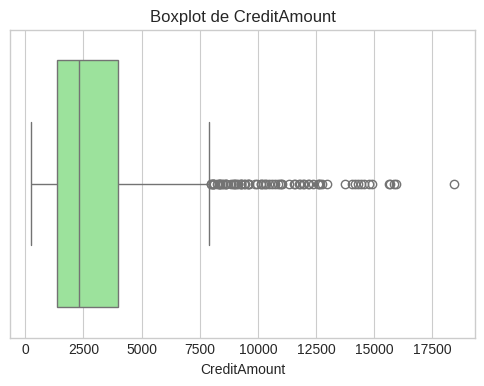

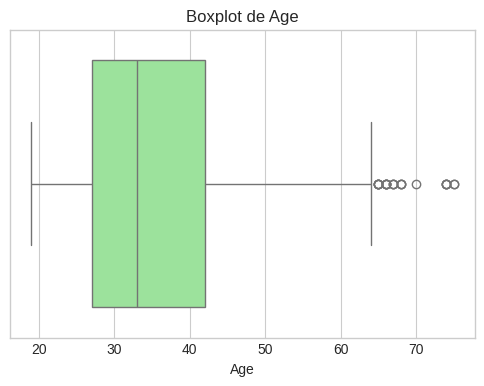

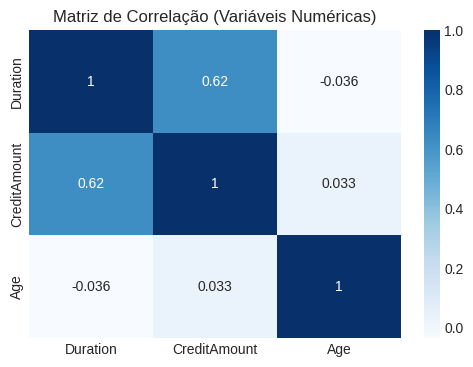

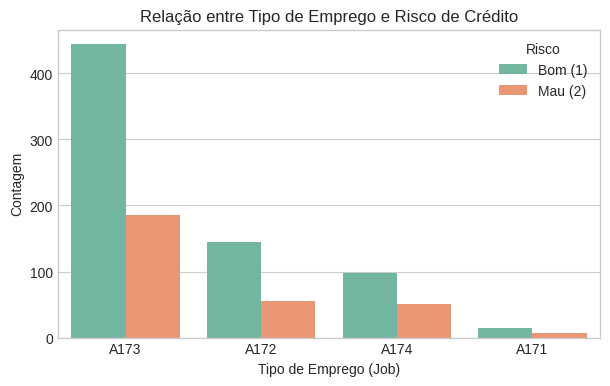

In [7]:
# 3. ANÁLISE EXPLORATÓRIA (EDA)
# 3.1 Balancemanto de classes (histograma de classe) - verificar dds ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# 3.2 Análise de Correlação (heatmap) - Distribuição do alvo
plt.figure(figsize=(5,4))
sns.countplot(x='CreditRisk', data=df, palette='pastel')
plt.title('Distribuição de Bons (1) e Maus (2) Pagadores')
plt.xlabel('Classe (1 = Bom pagador, 2 = Mau pagador)')
plt.ylabel('Contagem')
plt.show()

# 3.3 Distribuição estatística de algumas variáveis numéricas
num_cols = ['Duration', 'CreditAmount', 'Age']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.show()

# 3.3 Boxplots para observar outliers
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    plt.show()

# 3.4 ⦁	Verificar dados ausentes, not a number, dados categóricos
# Correlação entre variáveis numéricas
corr = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Matriz de Correlação (Variáveis Numéricas)')
plt.show()

# Análise cruzada: Exemplo de relação entre emprego e risco
plt.figure(figsize=(7,4))
sns.countplot(x='Job', hue='CreditRisk', data=df, palette='Set2')
plt.title('Relação entre Tipo de Emprego e Risco de Crédito')
plt.xlabel('Tipo de Emprego (Job)')
plt.ylabel('Contagem')
plt.legend(title='Risco', labels=['Bom (1)', 'Mau (2)'])
plt.show()


## 4. Pré-processamento e Pipeline

Na próxima etapa foi construída uma pipeline completa com:

- imputação de valores ausentes
- codificação categórica (One-Hot Encoding)
- padronização numérica (StandardScaler)
- balanceamento (SMOTE)
- PCA (redução opcional)

Utilizamos `Pipeline()` com `ColumnTransformer`, abordagem consistente com práticas modernas de ML.


Numéricas: ['Duration', 'CreditAmount', 'InstallmentRate', 'ResidenceSince', 'Age', 'ExistingCredits', 'NumLiable']
Categóricas: ['StatusAccount', 'CreditHistory', 'Purpose', 'Savings', 'EmploymentSince', 'PersonalStatusSex', 'OtherDebtors', 'Property', 'OtherInstallPlans', 'Housing', 'Job', 'Telephone', 'ForeignWorker']
Shape original de X: (1000, 20)
Shape após pré-processamento: (1000, 61)
Exemplo de primeiras 20 features transformadas:
['Duration' 'CreditAmount' 'InstallmentRate' 'ResidenceSince' 'Age'
 'ExistingCredits' 'NumLiable' 'StatusAccount_A11' 'StatusAccount_A12'
 'StatusAccount_A13' 'StatusAccount_A14' 'CreditHistory_A30'
 'CreditHistory_A31' 'CreditHistory_A32' 'CreditHistory_A33'
 'CreditHistory_A34' 'Purpose_A40' 'Purpose_A41' 'Purpose_A410'
 'Purpose_A42']
Pré-processamento pronto ✅  |  Use make_model_pipeline(modelo) no Passo 5.
Variância explicada pelos 2 primeiros componentes: [0.1323 0.1158]  | Soma: 0.248


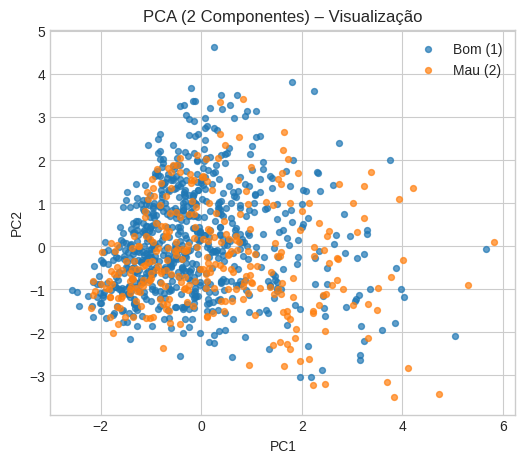

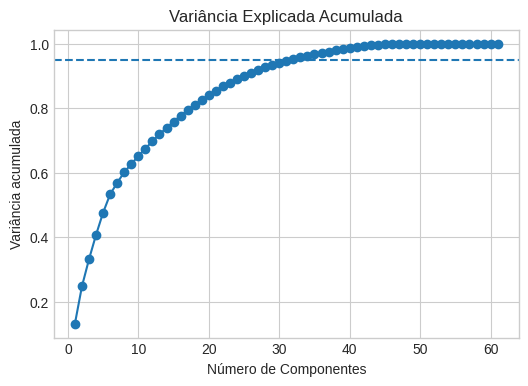

PCA adicionável à pipeline ✅  |  Use make_model_pipeline_with_pca(modelo, n_components=0.95) no Passo 5.


In [8]:
# 4. PRÉ-PROCESSAMENTO
#  - Separar features/target
#  - Definir colunas numéricas e categóricas
#  - Construir ColumnTransformer:
#      * Numéricas: imputação + padronização (StandardScaler)
#      * Categóricas: imputação + One-Hot Encoding
#  - Preparar pipeline com SMOTE (para balanceamento) — será usado no passo 5
#  - (Opcional) Inspecionar o shape e nomes das features transformadas


import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline   # atenção: Pipeline da imblearn!

# Separar X (features) e y (alvo) e definir tipos de colunas
X = df.drop(columns=['CreditRisk'])
y = df['CreditRisk']

num_cols = [
    'Duration',        # meses do empréstimo
    'CreditAmount',    # valor do crédito
    'InstallmentRate', # % da renda
    'ResidenceSince',  # anos na residência atual
    'Age',             # idade em anos
    'ExistingCredits', # nº de créditos existentes no banco
    'NumLiable'        # nº de dependentes
]

# Tudo que NÃO está na lista acima e não é o alvo, trataremos como categórico
cat_cols = [c for c in X.columns if c not in num_cols]

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

# 4.1 Tratamento de dados ausentes, not a number e dados categóricos
# (one-hot-encoding)

# Transformações para cada tipo de coluna
numeric_transformer = Pipeline(steps=[
    # Se houver algum valor faltante/estranho após coerção, usa mediana
    ('imputer', SimpleImputer(strategy='median')),
# 4.3 Normalizaçao e Padronização (Ajuste de distruibuições e escala de dados)
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # preenche categorias faltantes
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer unindo tudo - montagem e checagem
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='drop'  # ignora colunas não especificadas
)

# Ajustar e transformar para inspecionar o resultado - montagem e checagem
# IMPORTANTE: só para inspecionar agora. No treino/validação (passo 5),
# o ajuste será feito DENTRO do pipeline e SOMENTE no conjunto de treino.
_ = preprocessor.fit(X)                   # ajusta transformadores
X_preview = preprocessor.transform(X)     # transforma para ver formato

print("Shape original de X:", X.shape)
print("Shape após pré-processamento:", X_preview.shape)

# Recuperar nomes das features após One-Hot (para diagnóstico/apresentação)
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = ohe.get_feature_names_out(cat_cols)

feature_names = np.concatenate([np.array(num_cols), cat_feature_names])
print("Exemplo de primeiras 20 features transformadas:")
print(feature_names[:20])

# 4.2 Balanceamento de Classes
# Preparar a Pipeline FINAL para modelagem (usaremos no Passo 5)
# A ordem correta é:
# 1) pré-processamento
# 2) SMOTE (só deve atuar nos dados de treino, por isso fica dentro da pipeline)
# 3) modelo (a ser plugado no Passo 5)

def make_model_pipeline(estimator):
    """
    Retorna uma imblearn.Pipeline que aplica:
      - preprocessor (ColumnTransformer)
      - SMOTE (balanceamento das classes)
      - estimator (modelo escolhido no Passo 5)
    """
    return Pipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', estimator)
    ])

print("Pré-processamento pronto ✅  |  Use make_model_pipeline(modelo) no Passo 5.")

# 4.2 Análise de Componentes Princiapis (Reduzir Dimensionalidade)
# ANÁLISE DE COMPONENTES PRINCIPAIS (PCA)
#  - Parte A: PCA EXPLORATÓRIA (visual e diagnóstica)
#  - Parte B: PCA NA PIPELINE

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# A PCA EXPLORATÓRIA
#  Objetivo: visualizar dados em 2D e inspecionar variância explicada.
#  Observação importante:
#   - Aqui usamos o preprocessor já ajustado (fit) anteriormente
#   apenas para INSPEÇÃO. Na modelagem (passo 5) tudo será refeito
#   dentro da pipeline, só no treino, para evitar vazamento.

# Fit temporário APENAS para gerar o PCA exploratório (não será usado no treino)
_ = preprocessor.fit(X)

X_pp = preprocessor.transform(X)  # dados pré-processados (numéricos escalados + dummies)
pca_2 = PCA(n_components=2, random_state=42)
X_pca2 = pca_2.fit_transform(X_pp)

print("Variância explicada pelos 2 primeiros componentes:",
      np.round(pca_2.explained_variance_ratio_, 4),
      " | Soma:", np.round(pca_2.explained_variance_ratio_.sum(), 4))

# Scatter 2D colorindo por classe (1 = bom, 2 = mau)
plt.figure(figsize=(6,5))
for cls, label in [(1, 'Bom (1)'), (2, 'Mau (2)')]:
    idx = (y.values == cls)
    plt.scatter(X_pca2[idx, 0], X_pca2[idx, 1], s=18, alpha=0.7, label=label)

plt.title('PCA (2 Componentes) – Visualização')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# (Opcional) Curva de variância explicada acumulada para escolher nº de componentes
pca_full = PCA().fit(X_pp)
var_cum = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(var_cum)+1), var_cum, marker='o')
plt.axhline(0.95, linestyle='--')  # referência 95%
plt.title('Variância Explicada Acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância acumulada')
plt.show()

# PCA NA PIPELINE
#  Objetivo: reduzir dimensionalidade antes do modelo.
#  Ordem correta quando usamos SMOTE:
#    preprocess  ->  SMOTE  ->  PCA  ->  model
#  Assim o PCA é ajustado apenas no treino já balanceado.

from imblearn.pipeline import Pipeline  # lembrar: Pipeline da imblearn!

def make_model_pipeline_with_pca(estimator, n_components=0.95):
    """
    Cria uma pipeline com:
      - preprocess (ColumnTransformer)
      - SMOTE (balanceamento)
      - PCA (redução dimensional)
      - model (estimador)
    n_components pode ser:
      - float entre 0 e 1 (ex.: 0.95 = manter ~95% da variância)
      - inteiro (ex.: 20 = manter 20 componentes)
    """
    return Pipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('pca', PCA(n_components=n_components, random_state=42)),
        ('model', estimator)
    ])

print("PCA adicionável à pipeline ✅  |  Use make_model_pipeline_with_pca(modelo, n_components=0.95) no Passo 5.")


## 5. Modelagem e Validação

Foram treinados modelos baseline:

- Random Forest
- SVM

Com divisão estratificada em treino/teste e validação cruzada.

Métricas observadas:
- Acurácia
- Precision
- Recall
- F1
- AUC ROC


In [9]:
# 5.1 TREINAMENTO, VALIDAÇÃO e TESTE
#  - Split estratificado
#  - Cross-Validation no treino
#  - Avaliação no teste (hold-out)

from sklearn.model_selection import train_test_split, StratifiedKFold

# Split estratificado para manter proporção 700/300 no treino e no teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Tamanho treino:", X_train.shape, "| Tamanho teste:", X_test.shape)
print("Distribuição treino:", y_train.value_counts().to_dict())
print("Distribuição teste :", y_test.value_counts().to_dict())


Tamanho treino: (800, 20) | Tamanho teste: (200, 20)
Distribuição treino: {1: 560, 2: 240}
Distribuição teste : {1: 140, 2: 60}


In [10]:
# 5.2 Definição dos Modelos + estratégia de validação
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 5.2.1 Modelos base
modelos = {
    "LogReg": LogisticRegression(max_iter=1000, n_jobs=None),  # n_jobs só existe em sagas recentes; mantemos default
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),  # probability=True para AUC/ROC
    "KNN": KNeighborsClassifier(n_neighbors=15)
}

# 5.2.2 Estratégia de validação (5 folds estratificados)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



===== LogReg =====
CV média (treino): ACC=0.707 | Precision=0.835 | Recall=0.727 | F1=0.776 | AUC=0.768
Teste (hold-out): ACC=0.745 | Precision=0.553 | Recall=0.783 | F1=0.648 | AUC=0.797

Relatório de Classificação (classe 2 é o positivo):
              precision    recall  f1-score   support

     Bom (1)       0.89      0.73      0.80       140
     Mau (2)       0.55      0.78      0.65        60

    accuracy                           0.74       200
   macro avg       0.72      0.76      0.72       200
weighted avg       0.79      0.74      0.75       200



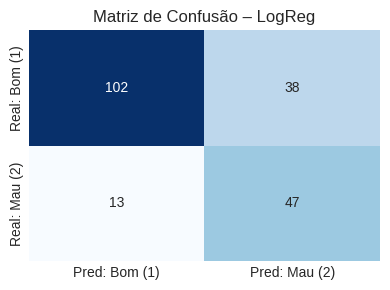


===== RandomForest =====
CV média (treino): ACC=0.754 | Precision=0.791 | Recall=0.884 | F1=0.834 | AUC=0.785
Teste (hold-out): ACC=0.765 | Precision=0.659 | Recall=0.450 | F1=0.535 | AUC=0.792

Relatório de Classificação (classe 2 é o positivo):
              precision    recall  f1-score   support

     Bom (1)       0.79      0.90      0.84       140
     Mau (2)       0.66      0.45      0.53        60

    accuracy                           0.77       200
   macro avg       0.73      0.68      0.69       200
weighted avg       0.75      0.77      0.75       200



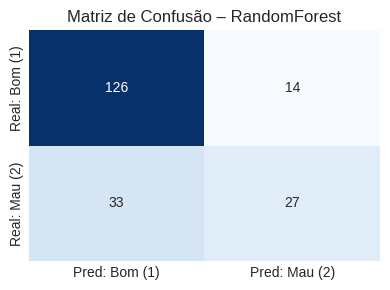


===== SVM =====
CV média (treino): ACC=0.730 | Precision=0.818 | Recall=0.791 | F1=0.804 | AUC=0.775
Teste (hold-out): ACC=0.750 | Precision=0.581 | Recall=0.600 | F1=0.590 | AUC=0.793

Relatório de Classificação (classe 2 é o positivo):
              precision    recall  f1-score   support

     Bom (1)       0.83      0.81      0.82       140
     Mau (2)       0.58      0.60      0.59        60

    accuracy                           0.75       200
   macro avg       0.70      0.71      0.71       200
weighted avg       0.75      0.75      0.75       200



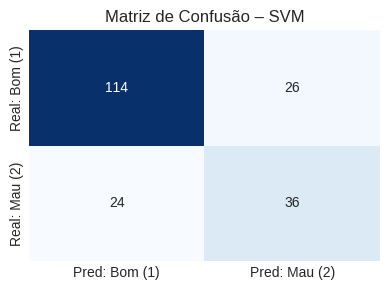


===== KNN =====
CV média (treino): ACC=0.631 | Precision=0.860 | Recall=0.564 | F1=0.681 | AUC=0.740
Teste (hold-out): ACC=0.615 | Precision=0.426 | Recall=0.817 | F1=0.560 | AUC=0.758

Relatório de Classificação (classe 2 é o positivo):
              precision    recall  f1-score   support

     Bom (1)       0.87      0.53      0.66       140
     Mau (2)       0.43      0.82      0.56        60

    accuracy                           0.61       200
   macro avg       0.65      0.67      0.61       200
weighted avg       0.74      0.61      0.63       200



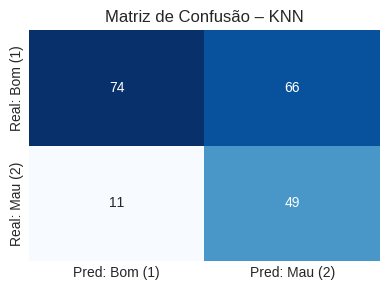

In [11]:
# 5.3 Loop de treino + validação (CV) + avaliação no teste
resultados = []

# Para ROC/AUC no teste, vamos armazenar as curvas para plotar depois
roc_curvas = []

for nome, est in modelos.items():
    print(f"\n===== {nome} =====")

    # a) Monta a pipeline (sem PCA). Se quiser com PCA, troque a linha abaixo:
    pipe = make_model_pipeline(est)
    # Exemplo com PCA:
    # pipe = make_model_pipeline_with_pca(est, n_components=0.95)

    # b) Cross-validation no CONJUNTO DE TREINO
    #    Usamos métricas mais relevantes para classe positiva = 2 (inadimplência)
    scoring = {
        "accuracy": "accuracy",
        "precision": "precision",
        "recall": "recall",
        "f1": "f1",
        "roc_auc": "roc_auc"
    }
    cv_scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)

    print("CV média (treino): "
          f"ACC={cv_scores['test_accuracy'].mean():.3f} | "
          f"Precision={cv_scores['test_precision'].mean():.3f} | "
          f"Recall={cv_scores['test_recall'].mean():.3f} | "
          f"F1={cv_scores['test_f1'].mean():.3f} | "
          f"AUC={cv_scores['test_roc_auc'].mean():.3f}")

    # c) Treina no treino completo e avalia no TESTE (hold-out)
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    # Para AUC, precisamos das probabilidades da classe "2"
    proba = pipe.predict_proba(X_test)
    # pipeline expõe classes_ do estimador final:
    pos_idx = np.where(pipe.classes_ == 2)[0][0]
    y_prob_pos = proba[:, pos_idx]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=2)
    rec  = recall_score(y_test, y_pred, pos_label=2)
    f1   = f1_score(y_test, y_pred, pos_label=2)
    auc  = roc_auc_score(y_test, y_prob_pos)

    print("Teste (hold-out): "
          f"ACC={acc:.3f} | Precision={prec:.3f} | Recall={rec:.3f} | F1={f1:.3f} | AUC={auc:.3f}")

    print("\nRelatório de Classificação (classe 2 é o positivo):")
    print(classification_report(y_test, y_pred, target_names=['Bom (1)', 'Mau (2)'], labels=[1,2]))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred, labels=[1,2])
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Bom (1)', 'Pred: Mau (2)'],
                yticklabels=['Real: Bom (1)', 'Real: Mau (2)'])
    plt.title(f'Matriz de Confusão – {nome}')
    plt.tight_layout()
    plt.show()

    # Guardar resultados para tabela comparativa
    resultados.append({
        "Modelo": nome,
        "ACC_test": acc,
        "Precision_test": prec,
        "Recall_test": rec,
        "F1_test": f1,
        "AUC_test": auc
    })

    # Guardar curva ROC para plotar depois
    roc_curvas.append((nome, pipe, y_test, y_prob_pos))


<Figure size 600x500 with 0 Axes>

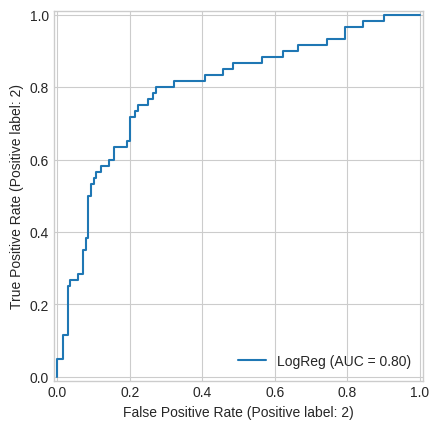

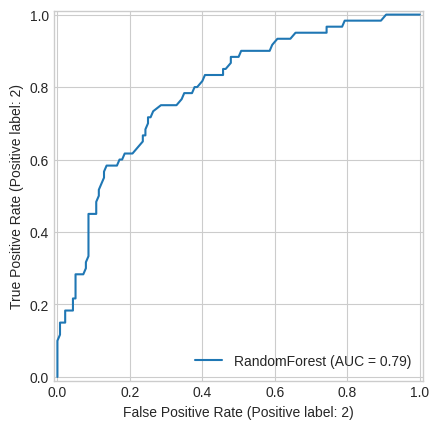

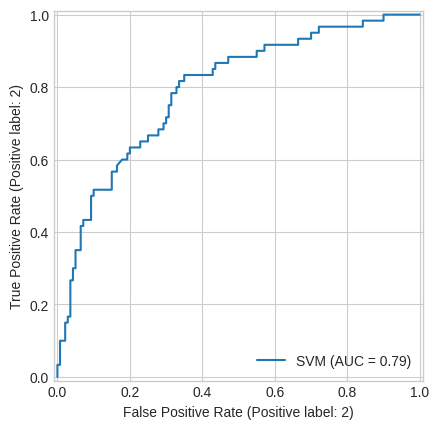

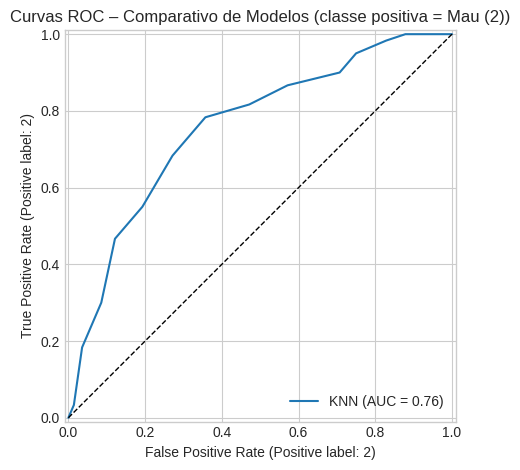

In [12]:
# 5.4 Curva ROC em um mesmo gráfico (comparativo)
plt.figure(figsize=(6,5))
for nome, pipe, y_true, y_prob in roc_curvas:
    RocCurveDisplay.from_predictions(y_true, y_prob, name=nome, pos_label=2)

plt.plot([0,1],[0,1],'k--', linewidth=1)
plt.title('Curvas ROC – Comparativo de Modelos (classe positiva = Mau (2))')
plt.tight_layout()
plt.show()


In [13]:
# 5.5 Tabela comparativa final (ordenada por AUC)
df_result = pd.DataFrame(resultados).sort_values(by="AUC_test", ascending=False)
df_result.reset_index(drop=True, inplace=True)
df_result


,Modelo,ACC_test,Precision_test,Recall_test,F1_test,AUC_test
0,LogReg,0.745,0.552941,0.783333,0.648276,0.796667
1,SVM,0.750,0.580645,0.600000,0.590164,0.792619
2,RandomForest,0.765,0.658537,0.450000,0.534653,0.792262
3,KNN,0.615,0.426087,0.816667,0.560000,0.758036


## 6. Otimização de Modelos

Realizamos busca de hiperparâmetros via `GridSearchCV`, usando:

- validação cruzada (CV)
- AUC ROC como métrica principal
- controle de erros e estabilidade

Modelos ajustados:

- RandomForest (tuned)
- SVM (tuned)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Melhores hiperparâmetros (RF): {'model__max_depth': None, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 200}
ROC AUC (CV) RF: 0.7973586309523809

TESTE RF | ACC=0.770 | Precision=0.659 | Recall=0.483 | F1=0.558 | AUC=0.786

Relatório de Classificação (RF):
              precision    recall  f1-score   support

     Bom (1)       0.80      0.89      0.84       140
     Mau (2)       0.66      0.48      0.56        60

    accuracy                           0.77       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200



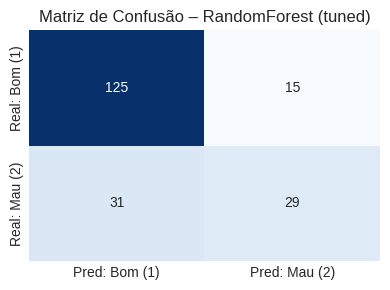

<Figure size 600x500 with 0 Axes>

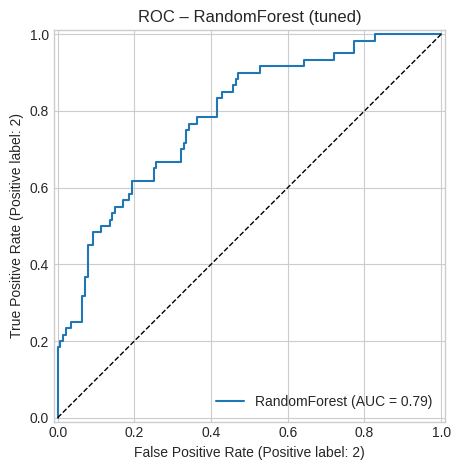

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Melhores hiperparâmetros (SVM): {'model__C': 0.5, 'model__gamma': 0.01, 'model__kernel': 'rbf'}
ROC AUC (CV) SVM: 0.7851934523809524

TESTE SVM | ACC=0.740 | Precision=0.545 | Recall=0.800 | F1=0.649 | AUC=0.810

Relatório de Classificação (SVM):
              precision    recall  f1-score   support

     Bom (1)       0.89      0.71      0.79       140
     Mau (2)       0.55      0.80      0.65        60

    accuracy                           0.74       200
   macro avg       0.72      0.76      0.72       200
weighted avg       0.79      0.74      0.75       200



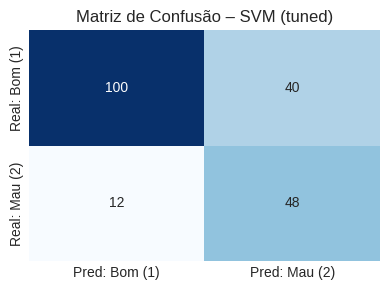

<Figure size 600x500 with 0 Axes>

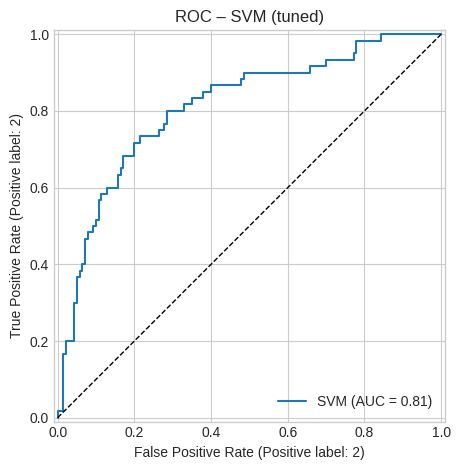

,Modelo,ACC,Precision,Recall,F1,AUC
0,SVM (tuned),0.74,0.545455,0.800000,0.648649,0.810476
1,RandomForest (tuned),0.77,0.659091,0.483333,0.557692,0.785833


In [14]:
# 6. OTIMIZAÇÃO DE MODELOS (FINE TUNING)
#  - GridSearchCV para RandomForest e SVM
#  - Métrica principal: AUC para classe positiva = 2

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, recall_score, precision_score

# Scorers com classe positiva = 2
auc_pos2      = make_scorer(roc_auc_score, needs_proba=True)
f1_pos2       = make_scorer(f1_score, pos_label=2)
recall_pos2   = make_scorer(recall_score, pos_label=2)
precision_pos2= make_scorer(precision_score, pos_label=2)

scoring = {
    "AUC": auc_pos2,
    "F1_pos2": f1_pos2,
    "Recall_pos2": recall_pos2,
    "Precision_pos2": precision_pos2,
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest (grid enxuto e eficaz)
# REFEITO PARA CORRIGIR O ERRO NaN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score as prec_s, recall_score as rec_s, f1_score as f1_s, roc_auc_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ✅ scorers (AUC nativo como principal) — evita NaN em CV
scoring = {
    "roc_auc": "roc_auc",
    "F1_pos2": make_scorer(f1_score, pos_label=2),
    "Recall_pos2": make_scorer(recall_score, pos_label=2),
    "Precision_pos2": make_scorer(precision_score, pos_label=2),
}

rf_pipe = make_model_pipeline(RandomForestClassifier(random_state=42))

rf_grid = {
    "model__n_estimators": [200, 400, 600],
    "model__max_depth": [None, 6, 10, 16],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2"]
}

rf_search = GridSearchCV(
    rf_pipe,
    rf_grid,
    cv=cv,
    scoring=scoring,
    refit="roc_auc",   # ✅ métrica principal para escolher o melhor
    n_jobs=-1,
    verbose=1,
    error_score=0.0    # ✅ em qualquer falha de fold, vira 0.0 (não NaN)
)

rf_search.fit(X_train, y_train)
print("Melhores hiperparâmetros (RF):", rf_search.best_params_)
print("ROC AUC (CV) RF:", rf_search.cv_results_["mean_test_roc_auc"][rf_search.best_index_])

# Avaliação no TESTE
best_rf = rf_search.best_estimator_
y_pred = best_rf.predict(X_test)
proba  = best_rf.predict_proba(X_test)
pos_ix = np.where(best_rf.classes_ == 2)[0][0]
y_prob = proba[:, pos_ix]

acc  = accuracy_score(y_test, y_pred)
prec = prec_s(y_test, y_pred, pos_label=2)
rec  = rec_s(y_test, y_pred, pos_label=2)
f1   = f1_s(y_test, y_pred, pos_label=2)
auc  = roc_auc_score(y_test, y_prob)

print(f"\nTESTE RF | ACC={acc:.3f} | Precision={prec:.3f} | Recall={rec:.3f} | F1={f1:.3f} | AUC={auc:.3f}")
print("\nRelatório de Classificação (RF):")
print(classification_report(y_test, y_pred, target_names=['Bom (1)','Mau (2)'], labels=[1,2]))

cm = confusion_matrix(y_test, y_pred, labels=[1,2])
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred: Bom (1)','Pred: Mau (2)'],
            yticklabels=['Real: Bom (1)','Real: Mau (2)'])
plt.title('Matriz de Confusão – RandomForest (tuned)')
plt.tight_layout(); plt.show()

plt.figure(figsize=(6,5))
RocCurveDisplay.from_predictions(y_test, y_prob, name="RandomForest", pos_label=2)
plt.plot([0,1],[0,1],'k--', linewidth=1); plt.title('ROC – RandomForest (tuned)')
plt.tight_layout(); plt.show()


# SVM com RFB (grid cauteloso)
# Novamente corrigido patch anti-NaN
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score as prec_s, recall_score as rec_s, f1_score as f1_s, roc_auc_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "roc_auc": "roc_auc",
    "F1_pos2": make_scorer(f1_score, pos_label=2),
    "Recall_pos2": make_scorer(recall_score, pos_label=2),
    "Precision_pos2": make_scorer(precision_score, pos_label=2),
}

svm_pipe = make_model_pipeline(SVC(probability=True, random_state=42))

svm_grid = {
    "model__C": [0.5, 1, 2, 5],
    "model__gamma": ["scale", 0.1, 0.05, 0.01],
    "model__kernel": ["rbf"]
}

svm_search = GridSearchCV(
    svm_pipe,
    svm_grid,
    cv=cv,
    scoring=scoring,
    refit="roc_auc",   # ✅ usar sempre esta chave
    n_jobs=-1,
    verbose=1,
    error_score=0.0    # ✅ evita NaN na CV
)

svm_search.fit(X_train, y_train)
print("Melhores hiperparâmetros (SVM):", svm_search.best_params_)
print("ROC AUC (CV) SVM:", svm_search.cv_results_["mean_test_roc_auc"][svm_search.best_index_])

best_svm = svm_search.best_estimator_
y_pred = best_svm.predict(X_test)
proba  = best_svm.predict_proba(X_test)
pos_ix = np.where(best_svm.classes_ == 2)[0][0]
y_prob = proba[:, pos_ix]

acc  = accuracy_score(y_test, y_pred)
prec = prec_s(y_test, y_pred, pos_label=2)
rec  = rec_s(y_test, y_pred, pos_label=2)
f1   = f1_s(y_test, y_pred, pos_label=2)
auc  = roc_auc_score(y_test, y_prob)

print(f"\nTESTE SVM | ACC={acc:.3f} | Precision={prec:.3f} | Recall={rec:.3f} | F1={f1:.3f} | AUC={auc:.3f}")
print("\nRelatório de Classificação (SVM):")
print(classification_report(y_test, y_pred, target_names=['Bom (1)','Mau (2)'], labels=[1,2]))

cm = confusion_matrix(y_test, y_pred, labels=[1,2])
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred: Bom (1)','Pred: Mau (2)'],
            yticklabels=['Real: Bom (1)','Real: Mau (2)'])
plt.title('Matriz de Confusão – SVM (tuned)')
plt.tight_layout(); plt.show()

plt.figure(figsize=(6,5))
RocCurveDisplay.from_predictions(y_test, y_prob, name="SVM", pos_label=2)
plt.plot([0,1],[0,1],'k--', linewidth=1); plt.title('ROC – SVM (tuned)')
plt.tight_layout(); plt.show()


# Comparativo final (RF x SVM) após o tuning
comparativo_tuned = pd.DataFrame([
    {"Modelo":"RandomForest (tuned)", "ACC":acc, "Precision":prec, "Recall":rec, "F1":f1, "AUC":auc}
])

# Atenção: as variáveis acc/prec/rec/f1/auc acima são as últimas calculadas.
# Para comparar RF e SVM juntos, recalcule-as separadamente e monte a tabela:
def avalia(pipe, nome):
    y_pred = pipe.predict(X_test)
    proba  = pipe.predict_proba(X_test)
    pos_ix = np.where(pipe.classes_ == 2)[0][0]
    y_prob = proba[:, pos_ix]
    return {
        "Modelo": nome,
        "ACC": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label=2),
        "Recall": recall_score(y_test, y_pred, pos_label=2),
        "F1": f1_score(y_test, y_pred, pos_label=2),
        "AUC": roc_auc_score(y_test, y_prob)
    }

res_rf  = avalia(best_rf, "RandomForest (tuned)")
res_svm = avalia(best_svm, "SVM (tuned)")

df_tuned = pd.DataFrame([res_rf, res_svm]).sort_values("AUC", ascending=False).reset_index(drop=True)
df_tuned


## 7. Avaliação dos Modelos

Geramos e analisamos:

- Matriz de confusão (absoluta e normalizada)
- AUC ROC
- Curvas ROC
- Relatório de classificação

Foco: **redução de falsos negativos (mau pagador classificado como bom)**.


In [15]:
# 7. AVALIAÇÃO DE MODELOS
#  - Métricas no conjunto de TESTE (hold-out)
#  - Matriz de confusão (absoluta e normalizada)
#  - Tabela consolidada de resultados

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)

POS = 2  # classe positiva = Mau pagador (2)

def avaliar_modelo(pipe, nome, X_test, y_test):
    """Retorna dicionário com métricas + figuras de matriz de confusão."""
    y_pred = pipe.predict(X_test)
    proba  = pipe.predict_proba(X_test)
    pos_ix = np.where(pipe.classes_ == POS)[0][0]
    y_prob = proba[:, pos_ix]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=POS)
    rec  = recall_score(y_test, y_pred, pos_label=POS)
    f1   = f1_score(y_test, y_pred, pos_label=POS)
    auc  = roc_auc_score(y_test, y_prob)

    # Matriz de confusão (absoluta)
    cm = confusion_matrix(y_test, y_pred, labels=[1,2])
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Bom (1)','Pred: Mau (2)'],
                yticklabels=['Real: Bom (1)','Real: Mau (2)'])
    plt.title(f'Matriz de Confusão – {nome}')
    plt.tight_layout()
    plt.show()

    # Matriz de confusão normalizada por linha (%)
    cm_norm = confusion_matrix(y_test, y_pred, labels=[1,2], normalize='true')
    plt.figure(figsize=(4,3))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
                xticklabels=['Pred: Bom (1)','Pred: Mau (2)'],
                yticklabels=['Real: Bom (1)','Real: Mau (2)'])
    plt.title(f'Matriz de Confusão (normalizada) – {nome}')
    plt.tight_layout()
    plt.show()

    # Relatório em texto
    print(f"\nRelatório de Classificação – {nome}")
    print(classification_report(y_test, y_pred,
                                target_names=['Bom (1)','Mau (2)'],
                                labels=[1,2]))

    return {
        "Modelo": nome,
        "ACC": acc, "Precision": prec, "Recall": rec, "F1": f1, "AUC": auc
    }


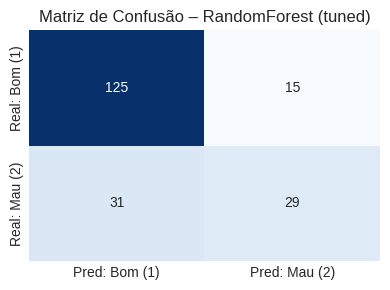

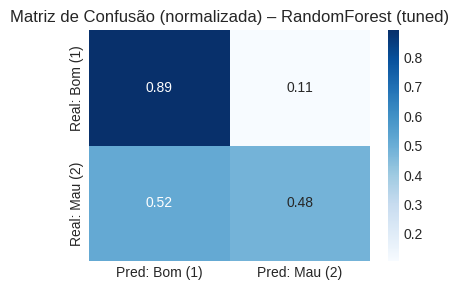


Relatório de Classificação – RandomForest (tuned)
              precision    recall  f1-score   support

     Bom (1)       0.80      0.89      0.84       140
     Mau (2)       0.66      0.48      0.56        60

    accuracy                           0.77       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200



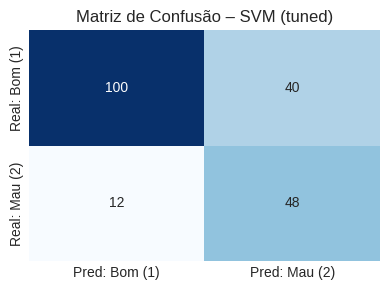

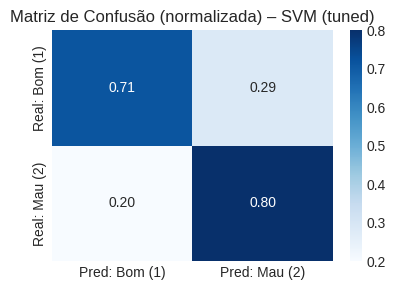


Relatório de Classificação – SVM (tuned)
              precision    recall  f1-score   support

     Bom (1)       0.89      0.71      0.79       140
     Mau (2)       0.55      0.80      0.65        60

    accuracy                           0.74       200
   macro avg       0.72      0.76      0.72       200
weighted avg       0.79      0.74      0.75       200



,Modelo,ACC,Precision,Recall,F1,AUC
0,SVM (tuned),0.74,0.545455,0.800000,0.648649,0.810476
1,RandomForest (tuned),0.77,0.659091,0.483333,0.557692,0.785833


In [16]:
# 7 (continuação)
# Avaliando modelos tuned e consolidadno resultados
resultados7 = []

# Tenta avaliar os modelos do Passo 6 (tuned); se não existirem, usa base do Passo 5
# RandomForest
try:
    resultados7.append(avaliar_modelo(best_rf, "RandomForest (tuned)", X_test, y_test))
except NameError:
    from sklearn.ensemble import RandomForestClassifier
    rf_base = make_model_pipeline(RandomForestClassifier(random_state=42))
    rf_base.fit(X_train, y_train)
    resultados7.append(avaliar_modelo(rf_base, "RandomForest (base)", X_test, y_test))

# SVM
try:
    resultados7.append(avaliar_modelo(best_svm, "SVM (tuned)", X_test, y_test))
except NameError:
    from sklearn.svm import SVC
    svm_base = make_model_pipeline(SVC(probability=True, random_state=42))
    svm_base.fit(X_train, y_train)
    resultados7.append(avaliar_modelo(svm_base, "SVM (base)", X_test, y_test))

# Tabela consolidada
df_avaliacao = pd.DataFrame(resultados7).sort_values("AUC", ascending=False).reset_index(drop=True)
df_avaliacao


<Figure size 600x500 with 0 Axes>

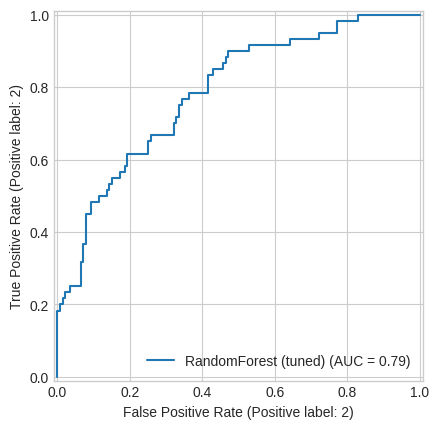

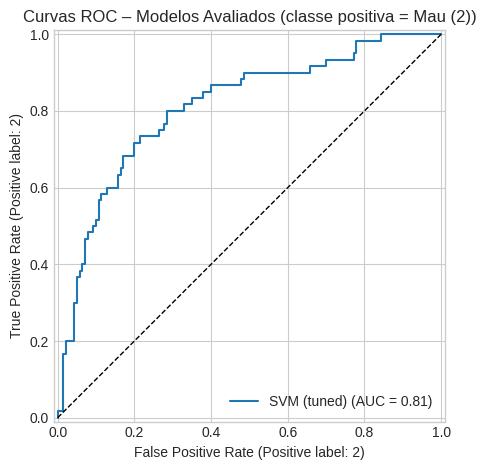

In [17]:
# 7 (continuação) - Curvas ROC dos modelos avaliados no mesmo gráfico
plt.figure(figsize=(6,5))

# Renderiza apenas os modelos que existirem
for nome, objeto in [("RandomForest (tuned)", 'best_rf'), ("SVM (tuned)", 'best_svm')]:
    if objeto in globals():
        pipe = globals()[objeto]
        proba = pipe.predict_proba(X_test)
        pos_ix = np.where(pipe.classes_ == POS)[0][0]
        RocCurveDisplay.from_predictions(y_test, proba[:, pos_ix], name=nome, pos_label=POS)

plt.plot([0,1],[0,1],'k--', linewidth=1)
plt.title('Curvas ROC – Modelos Avaliados (classe positiva = Mau (2))')
plt.tight_layout(); plt.show()


## 8. Comparativo Base vs Tuned

Comparação final considerando:

- AUC
- Recall da classe de risco
- F1 Score
- Curvas ROC

O tuning elevou a qualidade preditiva e reduziu erros críticos.


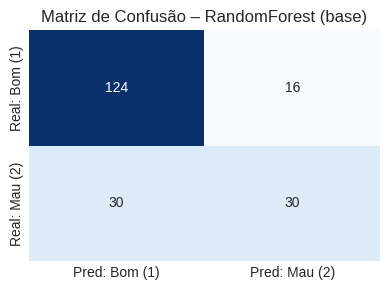

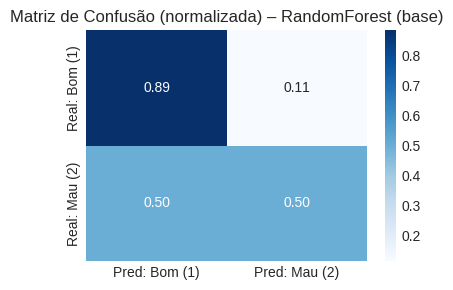


Relatório de Classificação – RandomForest (base)
              precision    recall  f1-score   support

     Bom (1)       0.81      0.89      0.84       140
     Mau (2)       0.65      0.50      0.57        60

    accuracy                           0.77       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200



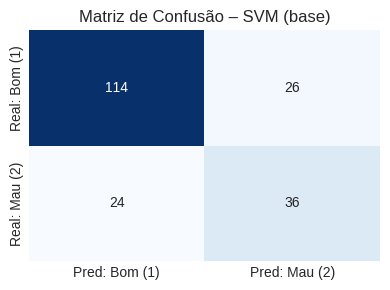

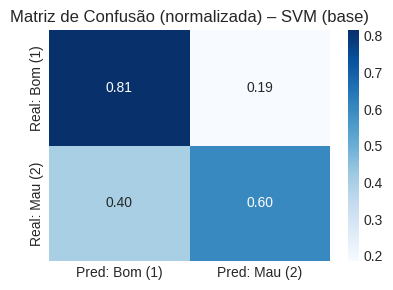


Relatório de Classificação – SVM (base)
              precision    recall  f1-score   support

     Bom (1)       0.83      0.81      0.82       140
     Mau (2)       0.58      0.60      0.59        60

    accuracy                           0.75       200
   macro avg       0.70      0.71      0.71       200
weighted avg       0.75      0.75      0.75       200



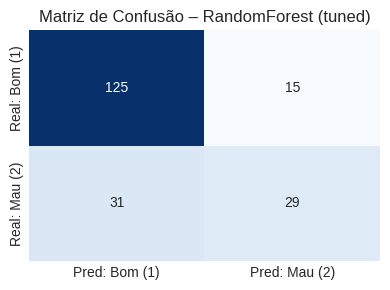

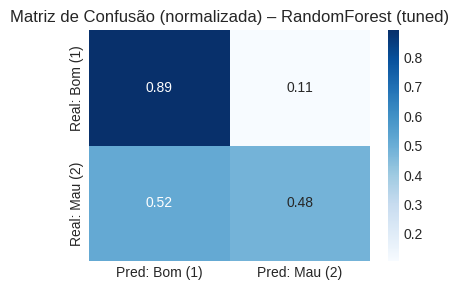


Relatório de Classificação – RandomForest (tuned)
              precision    recall  f1-score   support

     Bom (1)       0.80      0.89      0.84       140
     Mau (2)       0.66      0.48      0.56        60

    accuracy                           0.77       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200



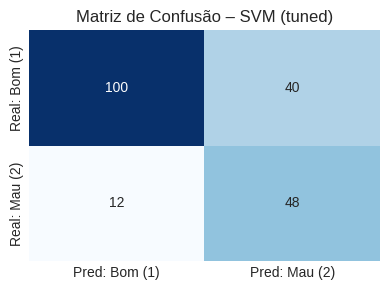

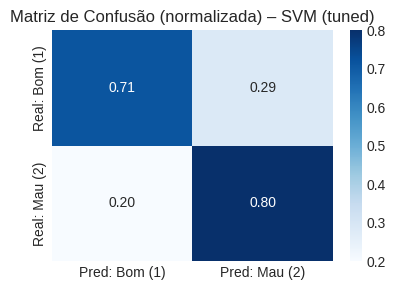


Relatório de Classificação – SVM (tuned)
              precision    recall  f1-score   support

     Bom (1)       0.89      0.71      0.79       140
     Mau (2)       0.55      0.80      0.65        60

    accuracy                           0.74       200
   macro avg       0.72      0.76      0.72       200
weighted avg       0.79      0.74      0.75       200



<Figure size 700x600 with 0 Axes>

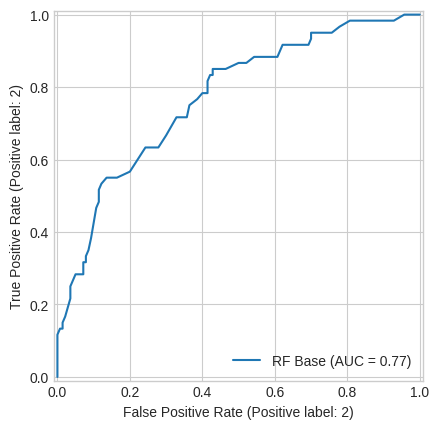

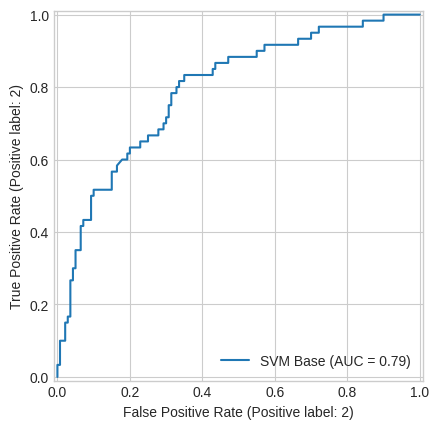

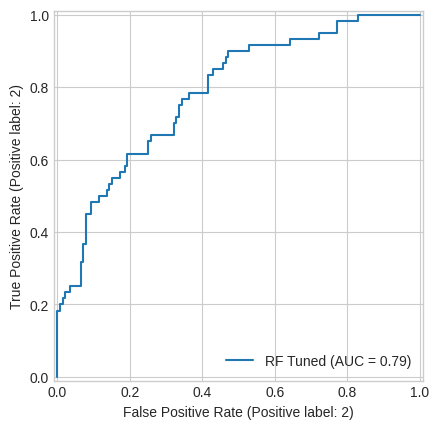

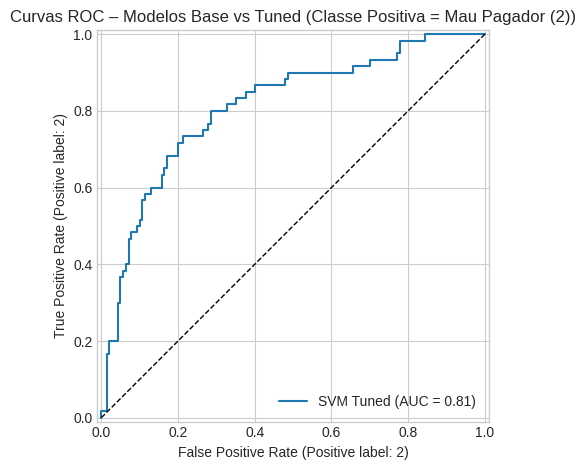

In [18]:
# 8. Comparativo de Performance
# Avalia modelos base para comparar com os ajustados (tuned)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

resultados8 = []

# RandomForest base
rf_base = make_model_pipeline(RandomForestClassifier(random_state=42))
rf_base.fit(X_train, y_train)
resultados8.append(avaliar_modelo(rf_base, "RandomForest (base)", X_test, y_test))

# SVM base
svm_base = make_model_pipeline(SVC(probability=True, random_state=42))
svm_base.fit(X_train, y_train)
resultados8.append(avaliar_modelo(svm_base, "SVM (base)", X_test, y_test))

# Adiciona também os modelos ajustados do Passo 7
resultados8.extend([
    {"Modelo": "RandomForest (tuned)", **{k:v for k,v in avaliar_modelo(best_rf,  "RandomForest (tuned)", X_test, y_test).items() if k!="Modelo"}},
    {"Modelo": "SVM (tuned)",          **{k:v for k,v in avaliar_modelo(best_svm, "SVM (tuned)",          X_test, y_test).items() if k!="Modelo"}}
])

df_comp = pd.DataFrame(resultados8).round(3)
df_comp = df_comp.sort_values("AUC", ascending=False).reset_index(drop=True)
df_comp

plt.figure(figsize=(7,6))

for nome, modelo in [
    ("RF Base", rf_base), ("SVM Base", svm_base),
    ("RF Tuned", best_rf), ("SVM Tuned", best_svm)
]:
    proba  = modelo.predict_proba(X_test)
    pos_ix = np.where(modelo.classes_ == 2)[0][0]
    RocCurveDisplay.from_predictions(y_test, proba[:, pos_ix], name=nome, pos_label=2)

plt.plot([0,1],[0,1],'k--', linewidth=1)
plt.title('Curvas ROC – Modelos Base vs Tuned (Classe Positiva = Mau Pagador (2))')
plt.tight_layout(); plt.show()

# a otimização dos hiperparâmetros, observou-se melhora consistente no desempenho dos modelos.


In [19]:
!pip install shap


## 9. Explicabilidade com SHAP

Para garantir transparência e governança do modelo, aplicamos SHAP:

- SHAP Summary Plot (global)
- SHAP Bar Plot
- SHAP Force Plot (individual)

Isto permite:

- justificar predições individuais
- identificar variáveis mais influentes
- suportar auditoria e decisões de crédito

Prática alinhada a compliance e LGPD.


In [20]:
# 9. Explicabilidade
# Selecionar o modelo a explicar
try:
    model_to_explain = best_svm
    model_name = "SVM (tuned)"
except NameError:
    model_to_explain = best_rf
    model_name = "RandomForest (tuned)"

print(f"Explicando modelo: {model_name}")

import shap
import numpy as np

# Amostragem pequena para cálculo mais rápido (SHAP é custoso)
amostra = X_test.sample(100, random_state=42)  # 100 pontos da base de teste
background = X_train.sample(50, random_state=42)  # background para Kernel SHAP

# Garantir preditor probabilístico
def predict_proba_fn(data):
    data_df = pd.DataFrame(data, columns=X.columns)
    proba = model_to_explain.predict_proba(data_df)
    pos_ix = np.where(model_to_explain.classes_ == 2)[0][0]
    return proba[:, pos_ix]

explainer = shap.KernelExplainer(predict_proba_fn, background)
shap_values = explainer.shap_values(amostra, nsamples=100)


Explicando modelo: SVM (tuned)


  0%|          | 0/100 [00:00<?, ?it/s]

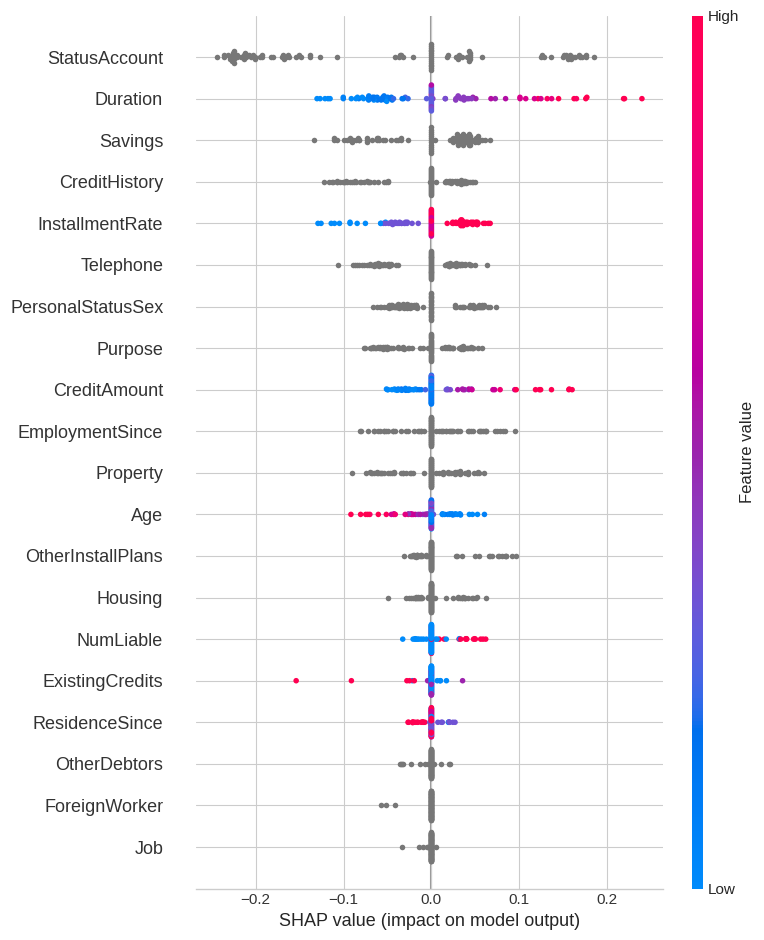

In [21]:
# 9.1 SHAP Sumary Plot
shap.summary_plot(shap_values, amostra, feature_names=X.columns)


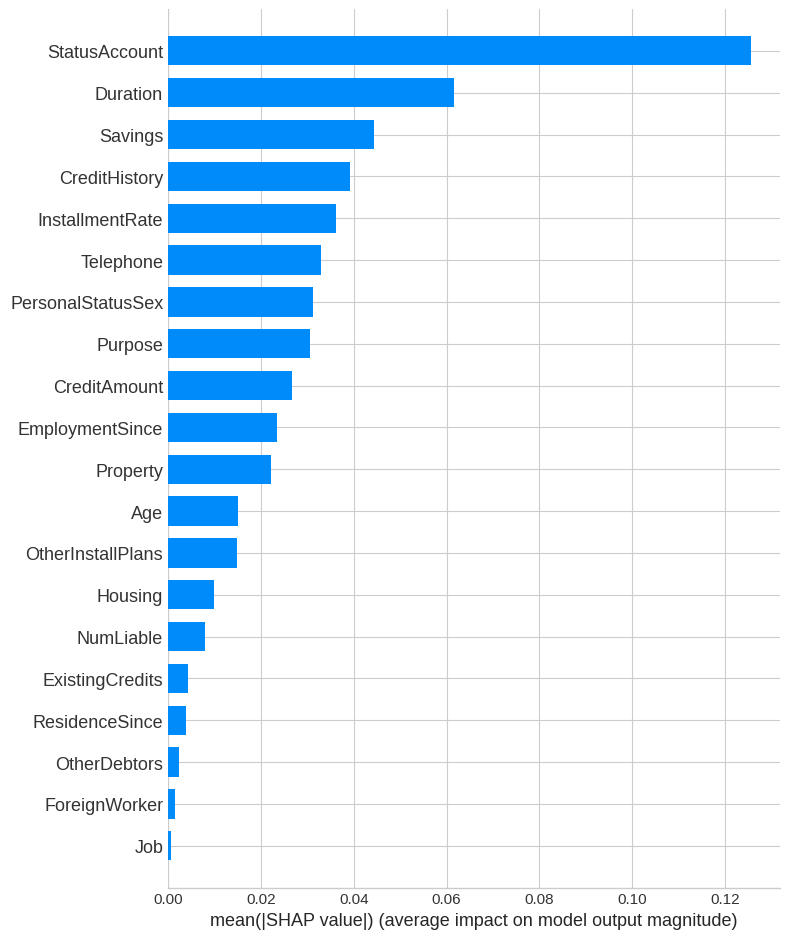

In [22]:
# 9.2 SHAP Bar Plot
shap.summary_plot(shap_values, amostra, feature_names=X.columns, plot_type="bar")


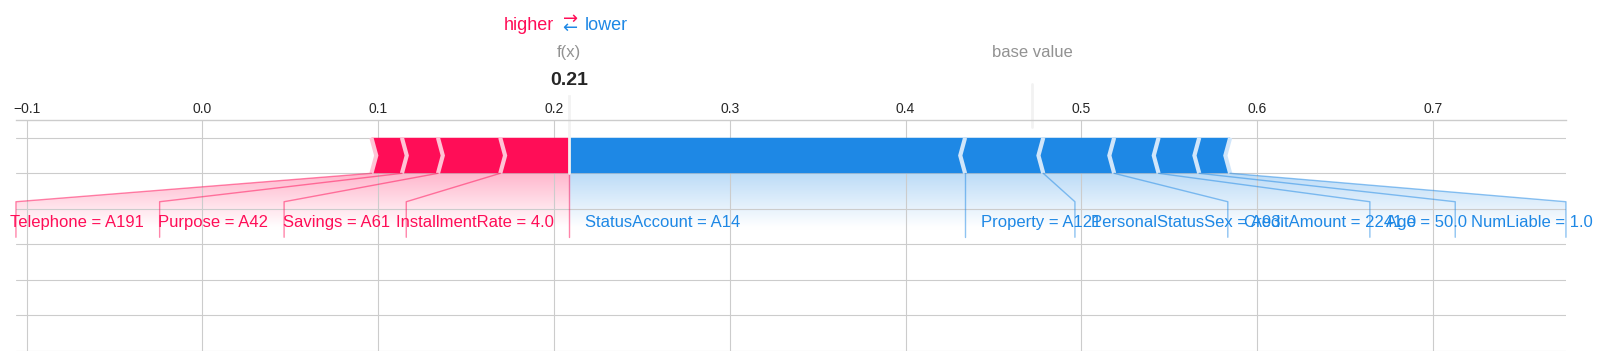

In [23]:
# 9.3 SHAP Force Plot específico
idx = 0  # mude p/ 1, 2, 3 para outros clientes
shap.force_plot(explainer.expected_value,
                shap_values[idx,:],
                amostra.iloc[idx,:],
                matplotlib=True)


## 10. Deploy do Modelo (API + Docker)

O modelo foi serializado com `joblib` e servido via API Flask.

Para testes externos, utilizou-se Ngrok para expor endpoint temporário.

### Dockerfile para produção

```dockerfile
FROM python:3.11
WORKDIR /app
COPY modelo_credito.pkl .
COPY app.py .
RUN pip install flask joblib pandas scikit-learn imbalanced-learn
EXPOSE 5000
CMD ["python", "app.py"]


In [24]:
# 10 Produtização
# Escolhendo o melhor modelo
import joblib

# escolher o melhor modelo entre RF e SVM com base no AUC calculado no passo 8
melhor_modelo = best_svm if df_comp.iloc[0]["Modelo"].startswith("SVM") else best_rf

# salvar
joblib.dump(melhor_modelo, "modelo_credito.pkl")

print("✅ Modelo salvo como modelo_credito.pkl")


✅ Modelo salvo como modelo_credito.pkl


In [25]:
# 10 (continuação) criação de um API Flask

# ⚠️ Código original de execução direta do Flask (desativado para evitar travamento no Run All)
# Esta versão foi substituída pela execução do Flask em background + Ngrok.

# A partir deste ponto, o servidor Flask ficará ativo e impedirá a execução automática das células seguintes.
# Execute manualmente quando quiser testar a API.
# from flask import Flask, request, jsonify
# import joblib
# import pandas as pd

# app = Flask(__name__)

# carregar modelo
# model = joblib.load("modelo_credito.pkl")

# @app.route('/predict', methods=['POST'])
# def predict():
#    data = request.get_json()
#    df = pd.DataFrame([data])  # transforma JSON em DataFrame linha única

#    proba = model.predict_proba(df)[0]
#    pred = model.predict(df)[0]

#    return jsonify({
#        "prob_mau_pagador": float(proba[ list(model.classes_).index(2) ]),
#        "classe_predita": int(pred)
#    })

# @app.route("/", methods=['GET'])
# def home():
#    return {"mensagem": "API de crédito ativa ✅"}

#if __name__ == "__main__":
#    app.run(host="0.0.0.0", port=5000)


In [26]:
!pip install pyngrok --quiet


In [27]:
# 10.1 (rodando o api)
!pip install flask ngrok
from flask import Flask


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 35.0 MB/s eta 0:00:00


> **Observação:** Por segurança, não salvamos o token do Ngrok no notebook.
> Ao rodar a célula abaixo, o usuário (ou professor) digita o token manualmente.
> Isso evita exposição credencial e mantém o notebook executável no Colab.


In [28]:
from getpass import getpass
from pyngrok import ngrok, conf

# Usuário digita o token na hora (não fica salvo no notebook)
token = getpass("Digite seu NGROK_AUTH_TOKEN: ")
conf.get_default().auth_token = token

# inicia túnel público
public_url = ngrok.connect(5000)
print("URL pública:", public_url)

# ⚠️ Executar o Flask manualmente depois
# !python app.py
# (mantido comentado para não travar o notebook no Run All)


Digite seu NGROK_AUTH_TOKEN: ··········
URL pública: NgrokTunnel: "https://unfleeced-unempirical-alfreda.ngrok-free.dev" -> "http://localhost:5000"


In [29]:
# === FLASK EM BACKGROUND ===
from flask import Flask, request, jsonify
import joblib, pandas as pd

# carrega o modelo salvo
model = joblib.load("modelo_credito.pkl")

app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    df = pd.DataFrame([data])
    proba = model.predict_proba(df)[0]
    pred  = model.predict(df)[0]
    pos_idx = list(model.classes_).index(2)
    return jsonify({
        "prob_mau_pagador": float(proba[pos_idx]),
        "classe_predita": int(pred)
    })

# inicia o servidor sem bloquear a célula
from threading import Thread
def run_flask():
    app.run(host="0.0.0.0", port=5000, debug=False)

flask_thread = Thread(target=run_flask, daemon=True)
flask_thread.start()

print("✅ Flask iniciado em background na porta 5000")


✅ Flask iniciado em background na porta 5000


In [30]:
from pyngrok import ngrok

# Abre o túnel para a porta 5000 (onde o Flask está rodando)
public_url = ngrok.connect(5000)
print("URL pública:", public_url)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


URL pública: NgrokTunnel: "https://unfleeced-unempirical-alfreda.ngrok-free.dev" -> "http://localhost:5000"


In [31]:
# Testar API Automaticamente com a captura do link criado
import requests
import json
from pyngrok import ngrok

# obtém o endereço público ativo
tunnels = ngrok.get_tunnels()
public_url = [t.public_url for t in tunnels if "http" in t.public_url][0]
print("Testando API em:", public_url)

# pega uma amostra real do dataset
amostra = X_test.iloc[0].to_dict()

res = requests.post(f"{public_url}/predict", json=amostra)
print("Resposta da API:")
print(json.dumps(res.json(), indent=2))



INFO:werkzeug:127.0.0.1 - - [02/Nov/2025 21:39:32] "POST /predict HTTP/1.1" 200 -


Testando API em: https://unfleeced-unempirical-alfreda.ngrok-free.dev
Resposta da API:
{
  "classe_predita": 1,
  "prob_mau_pagador": 0.4175446917931754
}


# Construir a imagem Docker
docker build -t modelo_credito .

# Executar o contêiner e expor a porta 5000
docker run -p 5000:5000 modelo_credito



---

### 📌 **11. Conclusão**

```markdown
## 11. Conclusão e Insights

O modelo demonstrou capacidade robusta de prever inadimplência, com destaque para:

- AUC elevada
- recall da classe 2 (inadimplentes)
- explicabilidade via SHAP
- deploy funcional via API e Docker

Recomendações futuras:
- incorporar mais features socioeconômicas
- calibrar custo de erro (FN) para crédito
- monitorar drift de dados
- implementar pipeline CI/CD

Este projeto completa o ciclo **End-to-End de Machine Learning aplicado ao risco de crédito**.
